## <center> *Вступ до машинного навчання*
## <center> *Лабораторна робота №1*
    
    
<p style="text-align: right;"> виконала: Немировська Вікторія </p>
<p style="text-align: right;"> група: ДА-01 </p>

## <center> *Дані на навчання*

Завантажимо дані для тренування з файлу lab_1_train.csv та розділимо значння інпутів та таргетів у відповідні змінні.

Відобразимо отримавнні значення у чисельному вигляді.

In [2]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt

In [17]:
#load train data from file
#get inputs and targets
train_data = np.loadtxt("C:\\Users\\nemiv\\Desktop\\MachineLearning\\lab_1_train.csv", delimiter=",",
                        skiprows=1, usecols=(1,2), dtype=float)
inputs = train_data[:, 0]
targets = train_data[:, 1]
display(inputs, targets)

array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
       0.05050505, 0.06060606, 0.07070707, 0.08080808, 0.09090909,
       0.1010101 , 0.11111111, 0.12121212, 0.13131313, 0.14141414,
       0.15151515, 0.16161616, 0.17171717, 0.18181818, 0.19191919,
       0.2020202 , 0.21212121, 0.22222222, 0.23232323, 0.24242424,
       0.25252525, 0.26262626, 0.27272727, 0.28282828, 0.29292929,
       0.3030303 , 0.31313131, 0.32323232, 0.33333333, 0.34343434,
       0.35353535, 0.36363636, 0.37373737, 0.38383838, 0.39393939,
       0.4040404 , 0.41414141, 0.42424242, 0.43434343, 0.44444444,
       0.45454545, 0.46464646, 0.47474747, 0.48484848, 0.49494949,
       0.50505051, 0.51515152, 0.52525253, 0.53535354, 0.54545455,
       0.55555556, 0.56565657, 0.57575758, 0.58585859, 0.5959596 ])

array([20.14901425, 19.97872273, 20.2347106 , 20.51751502, 20.01056207,
       20.03076901, 20.59497597, 20.37164456, 20.02077385, 20.34458619,
       20.06299489, 20.0825033 , 20.31501292, 19.68864219, 19.76535293,
       20.13434404, 20.01938299, 20.43770854, 20.09122914, 19.96014727,
       20.84373503, 20.35650953, 20.46470291, 20.03722201, 20.32153367,
       20.53832728, 20.17995445, 20.65816395, 20.38546496, 20.49835046,
       20.42554862, 21.18194608, 20.64241548, 20.34935339, 20.93363216,
       20.34081761, 20.78993181, 20.15957371, 20.36922095, 20.84693716,
       21.02962078, 20.87969331, 20.81379036, 20.77835576, 20.44533229,
       20.69313765, 20.7911013 , 21.26663162, 21.07278246, 20.46098694,
       21.1073262 , 20.91477835, 20.84742845, 21.25420996, 21.40020895,
       21.39049515, 20.87954787, 21.05875144, 21.2710962 , 21.48458273])

Зобразимо отримані дані у вигляді точкової діаграми.

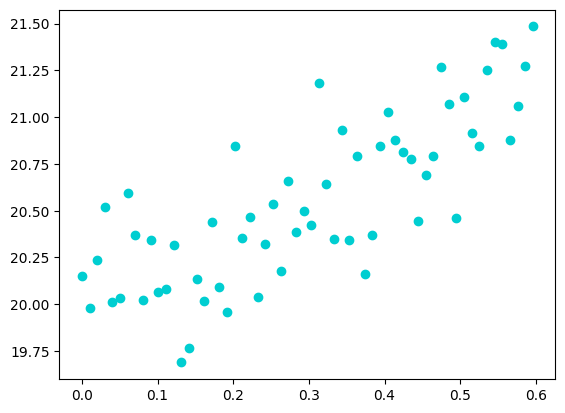

In [24]:
plt.plot(inputs, targets, 'o', color = 'darkturquoise')
plt.show()

## <center> *Реалізація градієнтного спуску*

Підбір коефіціентів для моделі буде виконуватися за допомогою мінімізації функції втрат за методом градієнтного спуску.

Функцією втрат є *Mean Squared Error (MSE)*.
    
$$ MSE(\theta) = \frac 1n \sum_{i=1}^{n}(y_i - \hat y_i)^2 = \frac 1n \sum_{i=1}^{n}(y_i - (\theta_0 + \theta_1 \cdot x_i))^2 $$
    
Оскільки для градієнтного спуску
    
$$ \theta_j := \theta_j - \alpha \frac{\partial MSE(\theta)}{\partial \theta_j} $$
    
$$ \frac{\partial MSE(\theta)}{\partial \theta_0} =
\frac{\partial }{\partial \theta_0} (\frac 1n \sum_{i=1}^{n}(y_i - (\theta_0 + \theta_1 \cdot x_i))^2) = 
-\frac 2n \sum_{i=1}^{n}(y_i - (\theta_0 + \theta_1 \cdot x_i)) = 
-\frac 2n \sum_{i=1}^{n}(y_i - \hat y_i) $$
    
$$ \frac{\partial MSE(\theta)}{\partial \theta_1} =
\frac{\partial }{\partial \theta_1} (\frac 1n \sum_{i=1}^{n}(y_i - (\theta_0 + \theta_1 \cdot x_i))^2) = 
-\frac 2n \sum_{i=1}^{n}(y_i - (\theta_0 + \theta_1 \cdot x_i) \cdot x_i) = 
-\frac 2n \sum_{i=1}^{n}((y_i - \hat y_i) \cdot x_i) $$
    
Вважаючи що $\theta_0 = bias$, $\theta_1 = weight$, а $\alpha = learningRate$ маємо:

$$ bias = bias + learningRate \cdot (\frac 2n \sum_{i=1}^{n}(y_i - (bias + weight \cdot x_i))) $$
    
$$ weight = weight + learningRate \cdot (\frac 2n \sum_{i=1}^{n}((y_i - (bias + weight \cdot x_i)) \cdot x_i)) $$

In [108]:
#calculation of Mean Squared Error (mse)
def calc_mse(true_val, val):
    mse = np.sum((true_val - val)**2)/len(true_val)
    return mse

#minimising cost function by using Gradient Descent method
def gradient_descent_meth(x, y, eps, bias, weight, learning_rate):
    new_y = bias + weight*x
    prev_mse = 0
    curr_mse = calc_mse(y, new_y)
    vec_size = len(y)
    cnt = 0
    
    while abs(curr_mse - prev_mse) > eps:
        bias = bias + (learning_rate*(2/vec_size * sum(y - new_y)))
        weight = weight + (learning_rate*(2/vec_size * sum((y - new_y)*x)))
        
        new_y = bias + weight*x
        prev_mse = curr_mse
        curr_mse = calc_mse(y, new_y)
        
        cnt += 1
        print("\n%2d iteration" % cnt)
        print("Mean Squared Error: %f" % curr_mse)
        print("Bias: %f\nWeight: %f" % (bias, weight))
        
    return bias, weight, curr_mse, cnt

З отриманих даних видно, що початкове значення для bias можна обрати в межах $10-18$, оскільки маємо лише одну колонку інпутів, значення яких варіюється в межах $19-22$.

Значення $eps$ визначає зупинку цикла та точність обчислень. Якщо при різниці попередньої $MSE$ та поточної значення є не більшим за $eps$, то цикл завершується. Для $eps$ обрано значення $0.01$.

Інші параметри підібрані інтуїтивно. Для $learningRate$ обрано число з оглядом на те, що метод пошуку мінімуму не повинен розбігатися.

In [109]:
 conclus_bias, conclus_weight, conclus_mse, conclus_iter = gradient_descent_meth(inputs, targets, 1e-2, 15.0, 1.0, 0.1)


 1 iteration
Mean Squared Error: 16.947417
Bias: 16.050317
Weight: 1.318963

 2 iteration
Mean Squared Error: 10.387792
Bias: 16.871561
Weight: 1.567716

 3 iteration
Mean Squared Error: 6.379169
Bias: 17.513732
Weight: 1.761586

 4 iteration
Mean Squared Error: 3.929466
Bias: 18.015915
Weight: 1.912555

 5 iteration
Mean Squared Error: 2.432420
Bias: 18.408664
Weight: 2.029992

 6 iteration
Mean Squared Error: 1.517543
Bias: 18.715864
Weight: 2.121218

 7 iteration
Mean Squared Error: 0.958431
Bias: 18.956188
Weight: 2.191958

 8 iteration
Mean Squared Error: 0.616728
Bias: 19.144231
Weight: 2.246686

 9 iteration
Mean Squared Error: 0.407884
Bias: 19.291404
Weight: 2.288901

10 iteration
Mean Squared Error: 0.280230
Bias: 19.406627
Weight: 2.321337

11 iteration
Mean Squared Error: 0.202191
Bias: 19.496872
Weight: 2.346132

12 iteration
Mean Squared Error: 0.154474
Bias: 19.567590
Weight: 2.364956

13 iteration
Mean Squared Error: 0.125285
Bias: 19.623043
Weight: 2.379117

14 iterat

Number of iterations: 16
Mean Squared Error: 0.089761
Bias: 19.727642
Weight: 2.402759


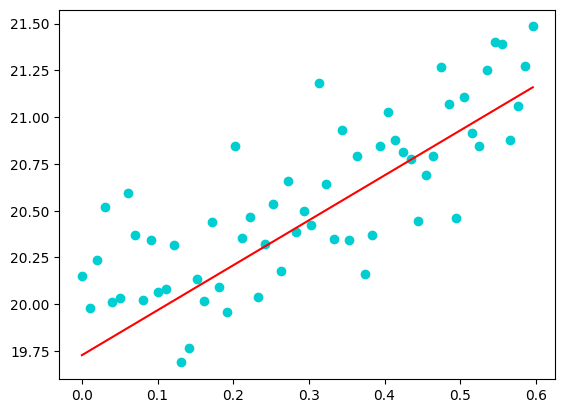

In [110]:
print("Number of iterations: %d\nMean Squared Error: %f\nBias: %f\nWeight: %f" % (conclus_iter, conclus_mse, conclus_bias, conclus_weight))
plt.plot(inputs, targets, 'o', color = 'darkturquoise')
plt.plot(inputs, conclus_bias + conclus_weight*inputs, '-r')
plt.show()

В результаті за $16$ ітерацій отримано $MSE = 0.089761$, що є непоганим результатом.

## <center> *Тестування моделі*
    
Завантажимо дані для тренування з файлу lab_1_test.csv та виконаємо передбачення за допомогою побудованої моделі.
    
Отриманий результат зобразимо на графіку.

Mean Squared Error: 0.080435
Bias: 19.727642
Weight: 2.402759


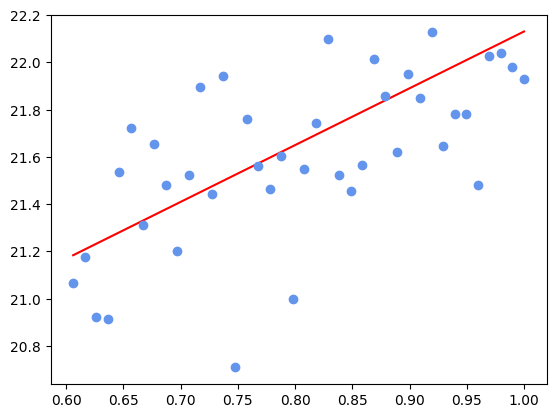

In [104]:
test_data = np.loadtxt("C:\\Users\\nemiv\\Desktop\\MachineLearning\\lab_1_test.csv", delimiter=",",
                       skiprows=1, usecols=(1,2), dtype=float)
test_inp = test_data[:, 0]
test_targ = test_data[:, 1]

new_targ = conclus_bias + conclus_weight*test_inp
test_mse = calc_mse(test_targ, new_targ)

print("Mean Squared Error: %f\nBias: %f\nWeight: %f" % (test_mse, conclus_bias, conclus_weight))
plt.plot(test_inp, new_targ, '-r')
plt.plot(test_inp, test_targ, 'o', color = 'cornflowerblue')
plt.show()

Підставивши отримані $bias = 19,727642$ та $weight = 2,402759$ маємо результат $MSE = 0,080435$. Результати при тестуванні моделі є трохи кращими ніж при тренуванні.

## ***Візуалізація всіх даних та побудованої моделі***

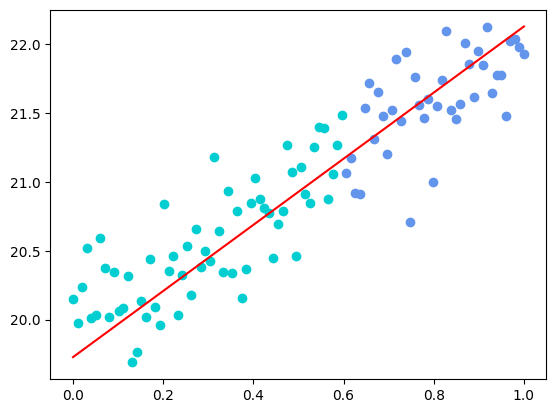

In [106]:
all_inp = np.append(inputs, test_inp)
plt.plot(inputs, targets, 'o', color = 'darkturquoise')
plt.plot(test_inp, test_targ, 'o', color = 'cornflowerblue')
plt.plot(all_inp, conclus_bias + conclus_weight*all_inp, '-r')
plt.show()

## <center> *Висновок*
    
У ході виконання лабораторної роботи №1 було реалізовано лінійну регресію з використанням методу градієнтного спуску для мінімізації функції втрат.
    
При тренуванні моделі велику роль відіграють стартові параметри та обрана точність для знаходження мінімуму.
    
Початкові значення $bias$ та $weight$ впливають на кількість ітерацій, чим ближчі ці значення до шуканого, тим швидше виконується обчислення.
    
При великому значенні $learningRate$ з великою вірогідністю розв'язок буде розбігатися, при занадто малому - довго збігатися до мінімуму.

Неоптимальний вибр точності може привести як до недонавчання так і до перенавчання. При більшій точності модель буде пристосована до отриманих на тренуванні значеннях, а на тестуванні буде давати більшу помилку. Чим менша точність, тим менше модель взагалі здатна прогнозувати значення таргетів.